In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
import zipfile
import os

with zipfile.ZipFile("./dataset/final_dataset.zip") as z:
    # open the csv file in the dataset
    with z.open("final_dataset.csv") as f:
        df = pd.read_csv(f , encoding= 'unicode_escape')

In [3]:
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/mÂ²),PAR (Âµmol/mÂ²/s),max. PAR (Âµmol/mÂ²/s),Tlog (degC),CO2 (ppm)
0,01.01.2016 00:10:00,999.03,0.01,273.25,-0.41,97.00,6.11,5.93,0.18,3.70,...,1.01,2.12,211.6,0.0,0.0,0.00,0.00,0.00,11.58,427.1
1,01.01.2016 00:20:00,999.07,0.06,273.29,-0.36,97.00,6.13,5.95,0.18,3.71,...,0.80,1.52,203.8,0.0,0.0,0.00,0.00,0.00,11.60,426.8
2,01.01.2016 00:30:00,999.09,0.07,273.30,-0.36,96.90,6.14,5.95,0.19,3.71,...,0.77,1.64,184.2,0.0,0.0,0.00,0.00,0.00,11.62,426.9
3,01.01.2016 00:40:00,999.09,-0.05,273.18,-0.50,96.80,6.09,5.89,0.19,3.68,...,0.84,1.92,200.1,0.0,0.0,0.00,0.00,0.00,11.64,427.7
4,01.01.2016 00:50:00,999.08,0.07,273.30,-0.33,97.10,6.14,5.96,0.18,3.72,...,0.33,0.84,159.8,0.0,0.0,0.00,0.00,0.00,11.65,428.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372163,01.02.2023 10:30:00,988.33,5.20,279.28,1.34,76.08,8.85,6.73,2.12,4.25,...,4.82,10.21,246.0,0.0,130.0,270.91,484.33,645.02,12.81,428.0
372164,01.02.2023 10:40:00,988.51,5.69,279.76,1.25,73.00,9.16,6.69,2.47,4.22,...,4.12,7.47,248.6,0.0,0.0,224.67,407.83,641.04,12.93,427.9
372165,01.02.2023 10:50:00,988.60,5.97,280.03,1.30,71.87,9.34,6.71,2.63,4.23,...,4.67,8.80,244.6,0.0,290.0,323.02,567.38,744.90,13.20,427.6
372166,01.02.2023 11:00:00,988.66,6.10,280.17,1.26,71.01,9.43,6.69,2.73,4.22,...,5.40,10.98,253.8,0.0,270.0,339.35,609.08,833.27,13.55,427.5


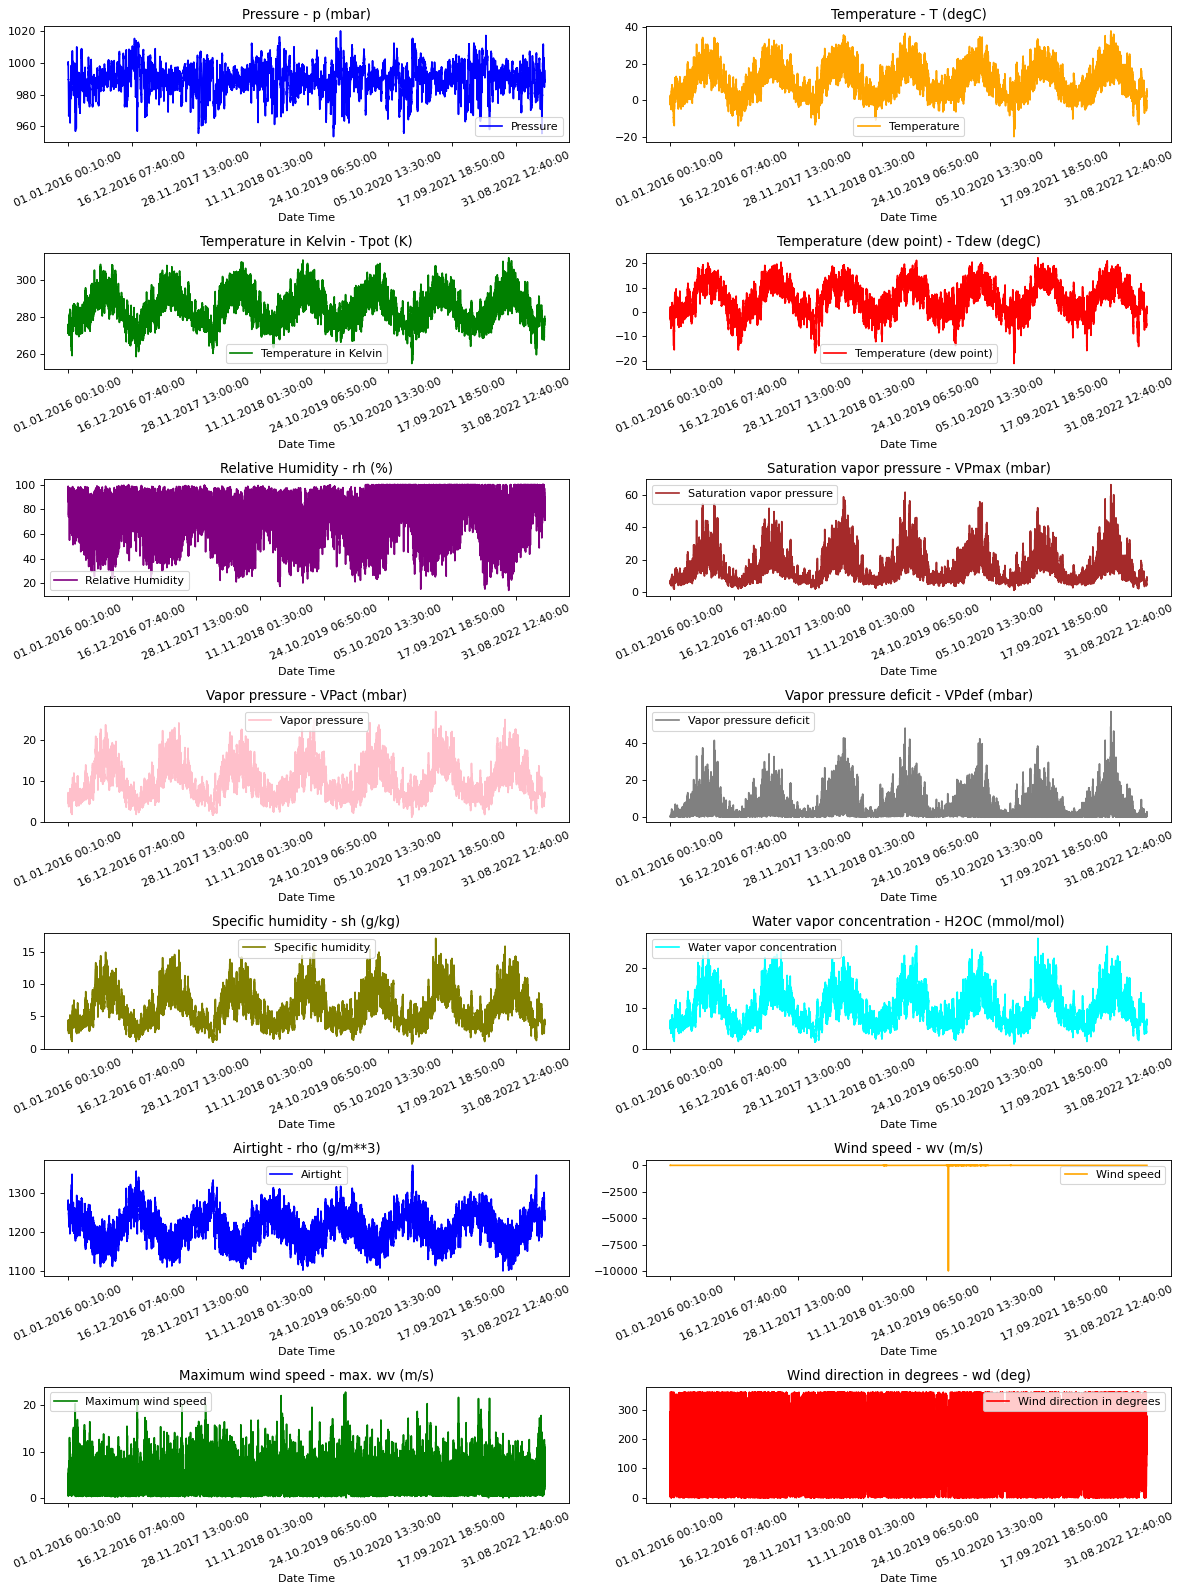

In [4]:
titles = [
    "Pressure",
    "Temperature",
    "Temperature in Kelvin",
    "Temperature (dew point)",
    "Relative Humidity",
    "Saturation vapor pressure",
    "Vapor pressure",
    "Vapor pressure deficit",
    "Specific humidity",
    "Water vapor concentration",
    "Airtight",
    "Wind speed",
    "Maximum wind speed",
    "Wind direction in degrees",
]

feature_keys = [
    "p (mbar)",
    "T (degC)",
    "Tpot (K)",
    "Tdew (degC)",
    "rh (%)",
    "VPmax (mbar)",
    "VPact (mbar)",
    "VPdef (mbar)",
    "sh (g/kg)",
    "H2OC (mmol/mol)",
    "rho (g/m**3)",
    "wv (m/s)",
    "max. wv (m/s)",
    "wd (deg)",
]

colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]

date_time_key = "Date Time"


def show_raw_visualization(data):
    time_data = data[date_time_key]
    fig, axes = plt.subplots(
        nrows=7, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{} - {}".format(titles[i], key),
            rot=25,
        )
        ax.legend([titles[i]])
    plt.tight_layout()


show_raw_visualization(df)

<AxesSubplot:>

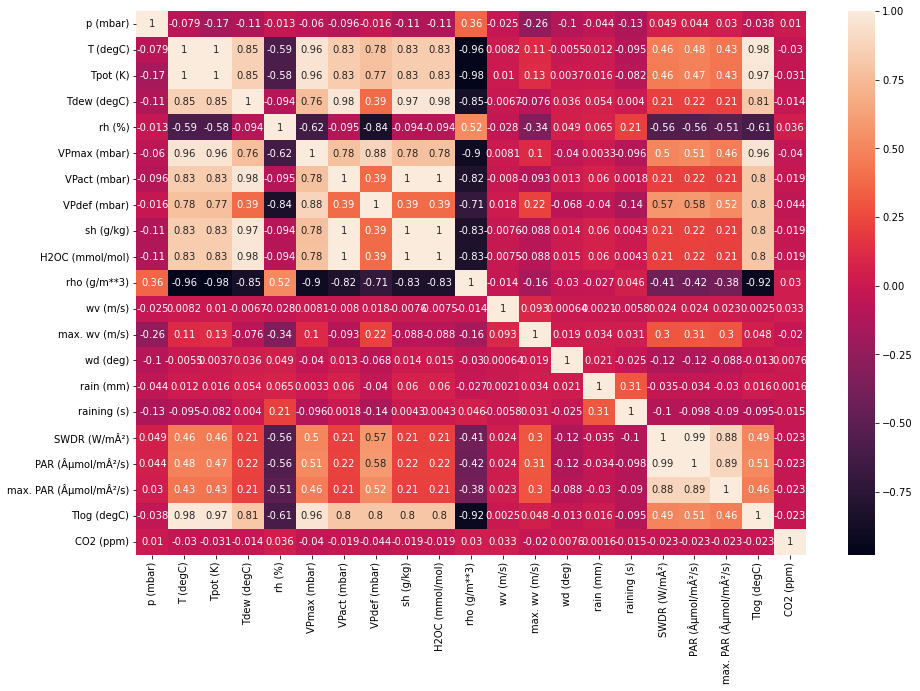

In [5]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [6]:
split_fraction = 0.70
train_split = int(split_fraction * int(df.shape[0]))
step = 6

past = 720
future = 72
learning_rate = 0.001
batch_size = 256
epochs = 8

In [7]:
print(
    "The selected parameters are:",
    ", ".join([titles[i] for i in [0, 1, 5, 7, 8, 10, 11]]),
)
selected_features = [feature_keys[i] for i in [0, 1, 5, 7, 8, 10, 11]]
features = df[selected_features]
features.index = df[date_time_key]
features.head()

The selected parameters are: Pressure, Temperature, Saturation vapor pressure, Vapor pressure deficit, Specific humidity, Airtight, Wind speed


,p (mbar),T (degC),VPmax (mbar),VPdef (mbar),sh (g/kg),rho (g/m**3),wv (m/s)
Date Time,,,,,,,
01.01.2016 00:10:00,999.03,0.01,6.11,0.18,3.70,1271.16,1.01
01.01.2016 00:20:00,999.07,0.06,6.13,0.18,3.71,1270.97,0.80
01.01.2016 00:30:00,999.09,0.07,6.14,0.19,3.71,1270.93,0.77
01.01.2016 00:40:00,999.09,-0.05,6.09,0.19,3.68,1271.54,0.84
01.01.2016 00:50:00,999.08,0.07,6.14,0.18,3.72,1270.93,0.33


In [8]:
labels = features[['T (degC)']].copy()
labels

,T (degC)
Date Time,
01.01.2016 00:10:00,0.01
01.01.2016 00:20:00,0.06
01.01.2016 00:30:00,0.07
01.01.2016 00:40:00,-0.05
01.01.2016 00:50:00,0.07
...,...
01.02.2023 10:30:00,5.20
01.02.2023 10:40:00,5.69
01.02.2023 10:50:00,5.97


In [9]:
from sklearn.preprocessing import MinMaxScaler
sc1=MinMaxScaler(feature_range=(0,1))#Scaled values btween 0,1
label_scaled=sc1.fit_transform(labels)
label_scaled

array([[0.34484545],
       [0.34570886],
       [0.34588154],
       ...,
       [0.44776377],
       [0.45000863],
       [0.45121741]])

In [10]:
sc=MinMaxScaler(feature_range=(0,1))#Scaled values btween 0,1
features_scaled=sc.fit_transform(features)
features_scaled[0]

array([0.68408408, 0.34484545, 0.07505008, 0.00317348, 0.18209501,
       0.62745098, 0.99867975])

In [11]:
features_scaled = pd.DataFrame(features_scaled)
features_scaled.head()

,0,1,2,3,4,5,6
0,0.684084,0.344845,0.075050,0.003173,0.182095,0.627451,0.998680
1,0.684685,0.345709,0.075358,0.003173,0.182704,0.626755,0.998659
2,0.684985,0.345882,0.075512,0.003350,0.182704,0.626608,0.998656
3,0.684985,0.343809,0.074742,0.003350,0.180877,0.628844,0.998663
4,0.684835,0.345882,0.075512,0.003173,0.183313,0.626608,0.998612


In [12]:
train_data = features_scaled.loc[0 : train_split - 1]
val_data = features_scaled.loc[train_split:]

In [13]:
train_data

,0,1,2,3,4,5,6
0,0.684084,0.344845,0.075050,0.003173,0.182095,0.627451,0.998680
1,0.684685,0.345709,0.075358,0.003173,0.182704,0.626755,0.998659
2,0.684985,0.345882,0.075512,0.003350,0.182704,0.626608,0.998656
3,0.684985,0.343809,0.074742,0.003350,0.180877,0.628844,0.998663
4,0.684835,0.345882,0.075512,0.003173,0.183313,0.626608,0.998612
...,...,...,...,...,...,...,...
260512,0.613363,0.463650,0.134227,0.028738,0.274665,0.487484,0.998856
260513,0.613213,0.464341,0.134689,0.028738,0.275883,0.486751,0.998998
260514,0.614865,0.465550,0.135460,0.029267,0.276492,0.486128,0.999072
260515,0.619670,0.464859,0.134998,0.029090,0.275883,0.488364,0.999066


In [14]:
val_data

,0,1,2,3,4,5,6
260517,0.622072,0.460542,0.132378,0.026975,0.273447,0.493128,0.999007
260518,0.622372,0.459506,0.131761,0.026622,0.273447,0.494154,0.999011
260519,0.621471,0.457089,0.130374,0.025740,0.271011,0.496280,0.999057
260520,0.621922,0.456052,0.129758,0.024683,0.272229,0.497306,0.998996
260521,0.621171,0.456052,0.129604,0.024330,0.272838,0.497123,0.998950
...,...,...,...,...,...,...,...
372163,0.523423,0.434467,0.117275,0.037377,0.215591,0.490343,0.999060
372164,0.526126,0.442929,0.122053,0.043547,0.213764,0.483196,0.998990
372165,0.527477,0.447764,0.124827,0.046368,0.214373,0.479128,0.999045
372166,0.528378,0.450009,0.126214,0.048131,0.213764,0.477222,0.999118


In [15]:
start = past + future
end = start + train_split

x_train = train_data[[i for i in range(7)]].values
y_train = features_scaled.iloc[start:end][[1]]

sequence_length = int(past / step)

In [16]:
train_data[[i for i in range(7)]].values

array([[0.68408408, 0.34484545, 0.07505008, ..., 0.18209501, 0.62745098,
        0.99867975],
       [0.68468468, 0.34570886, 0.0753583 , ..., 0.18270402, 0.62675463,
        0.99865877],
       [0.68498498, 0.34588154, 0.07551241, ..., 0.18270402, 0.62660803,
        0.99865578],
       ...,
       [0.61486486, 0.46554999, 0.13546001, ..., 0.27649208, 0.48612791,
        0.99907223],
       [0.61966967, 0.46485926, 0.13499769, ..., 0.27588307, 0.48836357,
        0.99906624],
       [0.62057057, 0.46244172, 0.13345662, ..., 0.27527406, 0.49089243,
        0.9990153 ]])

In [17]:
features_scaled.iloc[start:end][[1]]

,1
792,0.268693
793,0.269556
794,0.270420
795,0.271283
796,0.271283
...,...
261304,0.518218
261305,0.517009
261306,0.514592
261307,0.515282


In [18]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [19]:
x_end = len(val_data) - past - future
label_start = train_split + past + future

x_val = val_data.iloc[:x_end][[i for i in range(7)]].values
y_val = features_scaled.iloc[label_start:][[1]]

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)


for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (256, 120, 7)
Target shape: (256, 1)


In [20]:
features_scaled.iloc[label_start:][[1]]

,1
261309,0.513556
261310,0.512001
261311,0.513728
261312,0.514246
261313,0.512865
...,...
372163,0.434467
372164,0.442929
372165,0.447764
372166,0.450009


In [21]:
dataset_train

<BatchDataset element_spec=(TensorSpec(shape=(None, None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.float64, name=None))>

In [22]:
dataset_val

<BatchDataset element_spec=(TensorSpec(shape=(None, None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.float64, name=None))>

In [23]:
print('X_train Shape:',x_train.shape)
print('Y_train Shape:',y_train.shape)
print('X_val Shape:  ',x_val.shape)
print('Y_val Shape:  ',y_val.shape)

X_train Shape: (260517, 7)
Y_train Shape: (260517, 1)
X_val Shape:   (110859, 7)
Y_val Shape:   (110859, 1)


In [24]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.GRU(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 120, 7)]          0         
                                                                 
 gru (GRU)                   (None, 32)                3936      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 3,969
Trainable params: 3,969
Non-trainable params: 0
_________________________________________________________________


In [25]:
path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/8
1015/1015 [==============================] - ETA: 0s - loss: 0.0082
Epoch 1: val_loss improved from inf to 0.01419, saving model to model_checkpoint.h5
1015/1015 [==============================] - 476s 448ms/step - loss: 0.0082 - val_loss: 0.0142
Epoch 2/8
1015/1015 [==============================] - ETA: 0s - loss: 0.0044
Epoch 2: val_loss improved from 0.01419 to 0.01100, saving model to model_checkpoint.h5
1015/1015 [==============================] - 406s 400ms/step - loss: 0.0044 - val_loss: 0.0110
Epoch 3/8
1015/1015 [==============================] - ETA: 0s - loss: 0.0039
Epoch 3: val_loss improved from 0.01100 to 0.00800, saving model to model_checkpoint.h5
1015/1015 [==============================] - 418s 411ms/step - loss: 0.0039 - val_loss: 0.0080
Epoch 4/8
1015/1015 [==============================] - ETA: 0s - loss: 0.0031
Epoch 4: val_loss improved from 0.00800 to 0.00655, saving model to model_checkpoint.h5
1015/1015 [==============================] - 373s 368ms

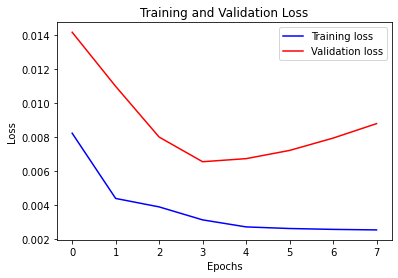

In [26]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

In [27]:
predictions = model.predict(dataset_val.take(110140))

431/431 [==============================] - 53s 121ms/step


In [28]:
predictions.shape

(110140, 1)

In [29]:
y_val.shape

(110859, 1)

In [30]:
y_val = y_val[:110140]
y_val

,1
261309,0.513556
261310,0.512001
261311,0.513728
261312,0.514246
261313,0.512865
...,...
371444,0.322051
371445,0.324124
371446,0.324814
371447,0.326887


In [31]:
predictions

array([[0.47854316],
       [0.47838026],
       [0.4784537 ],
       ...,
       [0.30357826],
       [0.30391032],
       [0.30409187]], dtype=float32)

In [32]:
a = labels.iloc[261309:,:]
a = a.iloc[:110140,:].values
a

array([[ 9.78],
       [ 9.69],
       [ 9.79],
       ...,
       [-1.15],
       [-1.03],
       [-0.92]])

In [33]:
a.shape

(110140, 1)

In [34]:
predictions

array([[0.47854316],
       [0.47838026],
       [0.4784537 ],
       ...,
       [0.30357826],
       [0.30391032],
       [0.30409187]], dtype=float32)

In [35]:
predictions = sc1.inverse_transform(predictions)
predictions.shape

(110140, 1)

In [36]:
import numpy as np
import math, random
from sklearn.metrics import mean_absolute_error, max_error, mean_squared_error
#Metrics

mae = mean_absolute_error(a, predictions)
print("MAE:", mae)

var2 = max_error(a, predictions)
print('Max Error:',var2)

rmse = math.sqrt(mean_squared_error(a, predictions))        
print("RMSE:",rmse)

mape = np.mean(np.abs(predictions - a)/np.abs(a)) 
print("MAPE:",np.round(mape*100,2),'%')

MAE: 4.353266063292301
Max Error: 19.535221939086917
RMSE: 5.431036601785584
MAPE: inf %


C:\Users\Raunak\AppData\Local\Temp\ipykernel_19564\2935589465.py:15: RuntimeWarning: divide by zero encountered in true_divide
  mape = np.mean(np.abs(predictions - a)/np.abs(a))


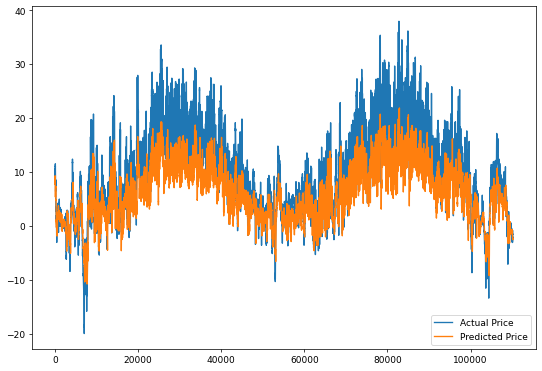

In [37]:
fig = plt.figure(figsize=(10,7),dpi=65)
plt.plot(a,label='Actual Price')  
plt.plot(predictions,label='Predicted Price')
          
plt.legend(loc=4)